# Average Temperature Predictions Based on Proposed Greenhouse Emissions in The Next Century

**Goal**: This project will use data on global and country-specific temperatures in the past, as well as greenhouse emissions, to provide predictions on global and country-specific temperatures in the future according to the proposed reductions in greenhouse emissions that various countries and regions have put forward at relevant climate conferences. 

# Data

**Global Land Temperatures By City**: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data <br>
**Greenhouse Gas Inventory Data**: https://www.kaggle.com/unitednations/international-greenhouse-gas-emissions <br>
**Climate Watch Pathways**: https://datasets.wri.org/dataset/cait-emissions-projections <br>

# Importing Libraries

In [139]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

# Loading Historical Global Land Temperatures Data

In [140]:
historicalTemps = pd.read_csv("EarthSurfaceTempData/GlobalLandTemperaturesByCountry.csv")
historicalTemps.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


# Cleaning up Historical Global Land Temperatures Data
Here I clean the dataframe to remove NaN values, and to take average temperature data for each country annually, instead of keeping the monthly data. This is because the GHG emission data is yearly and thus I want to match the time series correctly.

In [141]:
# separate dt column to have years 
historicalTemps['year'] = pd.DatetimeIndex(historicalTemps['dt']).year

# remove NaNs
historicalTemps = historicalTemps.dropna()

# snip all data from before 1990
historicalTemps = historicalTemps[historicalTemps['year'] > 1989]

# average yearly data to have one entry per year
yearlyAvgs = historicalTemps.groupby(
    ["year", "Country"])["AverageTemperature"].mean().reset_index()

yearlyAvgsUnc = historicalTemps.groupby(
    ["year", "Country"])["AverageTemperatureUncertainty"].mean().reset_index()

# combine uncertainty and temperature values together
yearlyAvgs['AverageTemperatureUncertainty'] = yearlyAvgsUnc['AverageTemperatureUncertainty']


# Loading Historical Global GHGs Emission Data

In [142]:
historicalGHGs = pd.read_csv("GreenhouseGasInventoryData/greenhouse_gas_inventory_data.csv")
historicalGHGs.head(10)

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...
5,Australia,2009,408448.479000,carbon_dioxide_co2_emissions_without_land_use_...
6,Australia,2008,404237.828214,carbon_dioxide_co2_emissions_without_land_use_...
7,Australia,2007,398816.453544,carbon_dioxide_co2_emissions_without_land_use_...
8,Australia,2006,391134.100909,carbon_dioxide_co2_emissions_without_land_use_...
9,Australia,2005,385581.132806,carbon_dioxide_co2_emissions_without_land_use_...


# Cleaning up Historical Global GHGs Emission Data
Here I clean up the GHG emission data to remove 2014 entries (since the temperature data only goes until 2013) and to clean up the categorical labels for easier analysis

In [143]:
# remove 2014 entries
historicalGHGs = historicalGHGs[historicalGHGs['year'] < 2014]
historicalGHGs.head(10)

# Shorten Catgory Names
historicalGHGs['category'].replace(
    {'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent':'CO2',
    'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent':'GHG',
    'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent':'GHG-Indirect-CO2',
    'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent':'HFC',
    'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent':'CH4',
    'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent':'NF3',
    'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent':'N2O',
    'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent':'PFCs',
    'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent':'SF6',
    'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent':'HFC-PFC-mix'
    }, 
    
    inplace = True)

## Investingating the "Category" Variable

['CO2' 'GHG-Indirect-CO2' 'GHG' 'HFC' 'CH4' 'NF3' 'N2O' 'PFCs' 'SF6'
 'HFC-PFC-mix']


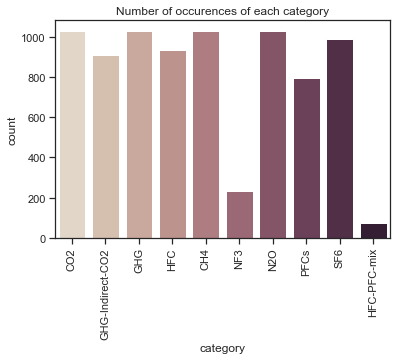

In [144]:
# plot number of occurences of each category in the dataframe
countPlot = sns.countplot(x="category", palette = "ch:.25", data = historicalGHGs)
countPlot.set_xticklabels(countPlot.get_xticklabels(), rotation=90)
countPlot.set_title("Number of occurences of each category")

# print the different categorical labels
print(historicalGHGs['category'].unique())

Text(0, 0.5, 'Kilotons CO2 Equivalent')

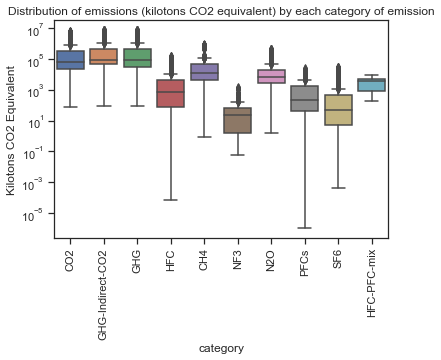

In [145]:
# plot the distribution of emission values for each categorical label 
boxPlot = sns.boxplot(x='category', y = 'value', data = historicalGHGs)
boxPlot.set_xticklabels(countPlot.get_xticklabels(), rotation=90)
boxPlot.set_yscale("log")
boxPlot.set_title("Distribution of emissions (kilotons CO2 equivalent) by each category of emission")
boxPlot.set_ylabel("Kilotons CO2 Equivalent")

# Combining Temperature and Emission Data
Here I'll combine the two datasets to match countries with their respective average yearly temperatures and emission totals

In [146]:
# yearlyAvgs, historicalGHGs

# change historicalGHGs "country_or_area" column to "country"
historicalGHGs.rename(columns={'country_or_area':'Country'}, inplace = True)
historicalGHGs['Country'].replace({'United States of America':'United States'}, inplace = True)

# merge the two datasets
tempEmissionData = pd.merge(yearlyAvgs, historicalGHGs, on=["Country", "year"])

# rename "value" and "category column to be more descriptive"
tempEmissionData.rename(columns={'category': 'GreenhouseEmissionType', 'value' : 'EmissionsKilotonnesCO2Equivalent'}, inplace=True)
tempEmissionData

,year,Country,AverageTemperature,AverageTemperatureUncertainty,EmissionsKilotonnesCO2Equivalent,GreenhouseEmissionType
0,1990,Australia,22.355750,0.185750,278265.898941,CO2
1,1990,Australia,22.355750,0.185750,418623.049563,GHG-Indirect-CO2
2,1990,Australia,22.355750,0.185750,418623.049563,GHG
3,1990,Australia,22.355750,0.185750,1424.683520,HFC
4,1990,Australia,22.355750,0.185750,118768.837813,CH4
...,...,...,...,...,...,...
7631,2013,United States,11.297111,0.318778,600.342163,NF3
7632,2013,United States,11.297111,0.318778,403349.746652,N2O
7633,2013,United States,11.297111,0.318778,5858.174564,PFCs
7634,2013,United States,11.297111,0.318778,7229.068816,SF6


In [147]:
# add column with total GHG emission of a country on a yearly basis. This could be useful for modeling later.

groupedEmissions = tempEmissionData.groupby(['Country', 'year'])['EmissionsKilotonnesCO2Equivalent'].sum().reset_index()
groupedEmissions.rename(columns={'EmissionsKilotonnesCO2Equivalent':'yearlyEmissionsKT'}, inplace=True)

# remerge dataframe with new 'yearlyEmissionsKT' included
tempEmissionData = pd.merge(tempEmissionData, groupedEmissions, on=['Country','year'])
tempEmissionData

,year,Country,AverageTemperature,AverageTemperatureUncertainty,EmissionsKilotonnesCO2Equivalent,GreenhouseEmissionType,yearlyEmissionsKT
0,1990,Australia,22.355750,0.185750,278265.898941,CO2,1.255869e+06
1,1990,Australia,22.355750,0.185750,418623.049563,GHG-Indirect-CO2,1.255869e+06
2,1990,Australia,22.355750,0.185750,418623.049563,GHG,1.255869e+06
3,1990,Australia,22.355750,0.185750,1424.683520,HFC,1.255869e+06
4,1990,Australia,22.355750,0.185750,118768.837813,CH4,1.255869e+06
...,...,...,...,...,...,...,...
7631,2013,United States,11.297111,0.318778,600.342163,NF3,2.039994e+07
7632,2013,United States,11.297111,0.318778,403349.746652,N2O,2.039994e+07
7633,2013,United States,11.297111,0.318778,5858.174564,PFCs,2.039994e+07
7634,2013,United States,11.297111,0.318778,7229.068816,SF6,2.039994e+07


# Saving cleaned dataframe to csv


In [148]:
tempEmissionData.to_csv('tempEmissionDataCleaned.csv', index = False)

In [150]:
df = pd.read_csv('tempEmissionDataCleaned.csv')
df

,year,Country,AverageTemperature,AverageTemperatureUncertainty,EmissionsKilotonnesCO2Equivalent,GreenhouseEmissionType,yearlyEmissionsKT
0,1990,Australia,22.355750,0.185750,278265.898941,CO2,1.255869e+06
1,1990,Australia,22.355750,0.185750,418623.049563,GHG-Indirect-CO2,1.255869e+06
2,1990,Australia,22.355750,0.185750,418623.049563,GHG,1.255869e+06
3,1990,Australia,22.355750,0.185750,1424.683520,HFC,1.255869e+06
4,1990,Australia,22.355750,0.185750,118768.837813,CH4,1.255869e+06
...,...,...,...,...,...,...,...
7631,2013,United States,11.297111,0.318778,600.342163,NF3,2.039994e+07
7632,2013,United States,11.297111,0.318778,403349.746652,N2O,2.039994e+07
7633,2013,United States,11.297111,0.318778,5858.174564,PFCs,2.039994e+07
7634,2013,United States,11.297111,0.318778,7229.068816,SF6,2.039994e+07


# Exploratory Data Analysis
Here I'll look into relationships between the average temperature and emission of countries over time, looking at both yearly total emissions and specific types of emissions